# Tools
In this lab we will make use of:

NumPy, a popular library for scientific computing

Matplotlib, a popular library for plotting data

Pandas, a popular open-source data analysis library

scikit-learn (or sklearn), an open-source machine learning library that provides a wide range of algorithms for various machine learning tasks such as classification, regression, clustering, and dimensionality reduction. 

In [548]:
# Import helpful libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
# from sklearn.metrics import accuracy_score #accuracy_score function, which is a classification metric

# RANDOM_STATE = 55 ## We will pass it to every sklearn call so we ensure reproducibility

### Note on the difference between GradientBoostingRegressor and xgboost

Both GradientBoostingRegressor and xgboost are machine learning algorithms used for gradient boosting regression. However, there are a few differences between the two:

Implementation: GradientBoostingRegressor is an implementation of gradient boosting provided by scikit-learn, whereas xgboost is an independent open-source library developed specifically for gradient boosting.

Performance: xgboost is known for its speed and scalability, and is often faster and more efficient than scikit-learn's implementation of gradient boosting.

Flexibility: xgboost offers more flexibility and customizability than scikit-learn's GradientBoostingRegressor. For example, xgboost allows for the tuning of hyperparameters such as learning rate, subsampling rate, and regularization, whereas scikit-learn's implementation has fewer hyperparameters that can be tuned.

Handling missing values: xgboost has built-in handling of missing values, whereas scikit-learn's GradientBoostingRegressor requires preprocessing to handle missing values.

In general, if you are working with a smaller dataset and don't require a lot of customization, GradientBoostingRegressor may be a simpler option. If you are working with larger datasets or require more flexibility and customization, xgboost may be a better choice.

In [427]:
# find current working directory (cwd)
#os.getcwd()

In [549]:
# create a file path
file_path = 'Downloads/train.csv/train.csv'

# Data Loading

In [550]:
# Load the data
data = pd.read_csv(file_path)
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


# Data Exploration and Preprocessing

## Analyze the datasets to identify missing values

In [551]:
# isna(). sum() .
# This returns the columns in our Pandas dataframe along with the number of missing values detected in each one
data.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

There are no NaN values in our columns. For City Group and Type we'll use one hot vectors (One-hot encoding is essentially the representation of categorical variables as binary vectors).

## Explore variables

In [552]:

    # Exploring the variable City further to see how many cities do we have:
    data['City'].unique()
    #or:
    # data.iloc[:,2].unique() #selects all rows of the third column (City) of a Pandas DataFrame data, and returns an array of unique values in that column.
    
    
    
    # data.groupby('City').count()

    

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

convert the column values of "Open Date" to datetime:
- The code data.Open_date = pd.to_datetime(data.Open_date,dayfirst = False) converts the 'Open_date' column in a Pandas DataFrame 'data' from a string data type to a datetime data type.

- The function takes the column as the first argument, and the dayfirst parameter is set to False to indicate that the format of the date is not in the day-first format.

- The result of this operation is that the 'Open_date' column will be stored as a datetime data type, which will allow for various datetime operations to be performed on it.

In [553]:
data['Open Date'] = pd.to_datetime(data['Open Date'],dayfirst = False)


In [554]:
data[['year']] = pd.DataFrame(data['Open Date'].dt.year)
data[['day']] = pd.DataFrame(data['Open Date'].dt.day)
data[['month']] = pd.DataFrame(data['Open Date'].dt.month)

In [555]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P32,P33,P34,P35,P36,P37,revenue,year,day,month
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,4,5,5,4,3,4,5653753.0,1999,17,7
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,6923131.0,2008,14,2
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,2055379.0,2013,9,3
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,10,6,18,12,12,6,2675511.0,2012,2,2
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3,2,3,4,3,3,4316715.0,2009,9,5


We can remove the first column as it is the same as the index of the dataset. 

In [556]:
data = data.drop(['Id'], axis=1) # axis=1 means we are dropping the column, not the row.

In [557]:
# We will remove the columns Open Date, month, day, and City ( as it is highly correlated with some other variables such as City Group, Demographic, Real state and Commercial data) 
data = data.drop(['City', 'Open Date', 'month', 'day'], axis=1)

# We could also use the following code:
# data.drop(columns = ['Open Date','City'],inplace = True)
#The columns parameter specifies the list of columns to be dropped. The inplace parameter is set to True, which means that the DataFrame is modified in place (i.e., the original DataFrame is altered and no copy is made).


In [292]:
'''
# Find all the unique symbols in the "City" column
unique_symbols = data["City"].str.extractall(r'([^a-zA-Z0-9\s])')[0].unique()

# Print the unique symbols
print("Unique symbols in the City column:", unique_symbols)

'''

'\n# Find all the unique symbols in the "City" column\nunique_symbols = data["City"].str.extractall(r\'([^a-zA-Z0-9\\s])\')[0].unique()\n\n# Print the unique symbols\nprint("Unique symbols in the City column:", unique_symbols)\n\n'

In [293]:
'''
# Remove all symbols from the "City" column
data["City"] = data["City"].str.replace(r'[^a-zA-Z0-9\s]', '')

# Print the modified DataFrame
print(data)

'''

'\n# Remove all symbols from the "City" column\ndata["City"] = data["City"].str.replace(r\'[^a-zA-Z0-9\\s]\', \'\')\n\n# Print the modified DataFrame\nprint(data)\n\n'

## One-hot encoding using Pandas
First we will remove the binary variables, because one-hot encoding them would do nothing to them. To achieve this we will just count how many different values there are in each categorical variable and consider only the variables with 3 or more values.

In [558]:
cat_variables = ['City Group', 'Type', 'year']

As a reminder, one-hot encoding aims to transform a categorical variable with `n` outputs into `n` binary variables.

Pandas has a built-in method to one-hot encode variables, it is the function `pd.get_dummies`. There are several arguments to this function, but here we will use only a few. They are:

 - data: DataFrame to be used
 - prefix: A list with prefixes, so we know which value we are dealing with
 - columns: the list of columns that will be one-hot encoded. 'prefix' and 'columns' must have the same length.

In [559]:
# Convert categorical variables to n binary variables. One-hots for City, City Group and Type


# This will replace the columns with the one-hot encoded ones and keep the columns outside 'columns' argument as it is.
data = pd.get_dummies(data = data,
                         prefix = cat_variables,
                         columns = cat_variables)


In [295]:
#data = data.join(City)
#data = data.join(City_groups)
#data = data.join(Types)

In [560]:
data.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,0,0,0,0,0,0,0,0,0,0
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,0,0,0,1,0,0,0,0,0,0
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,0,0,0,0,0,0,0,0,1,0
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,0,0,0,0,0,0,0,1,0,0
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,0,0,0,0,1,0,0,0,0,0


In [476]:
#data = data.drop(['City', 'City Group', 'Type'], axis=1)



## Some Statistics


In [561]:
data.describe()
#data[['revenue']].describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,...,0.029197,0.051095,0.051095,0.102190,0.116788,0.109489,0.182482,0.131387,0.087591,0.014599
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,...,0.168976,0.220999,0.220999,0.304009,0.322346,0.313398,0.387658,0.339063,0.283737,0.120379
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Skewness of revenue: 2.793478695162504


"\n#or:\n\nplt.hist(data['revenue'])\nplt.xlabel('revenue')\nplt.ylabel('Count')\nplt.show()\n\n# or\n#sns.displot(data.revenue)\n\n"

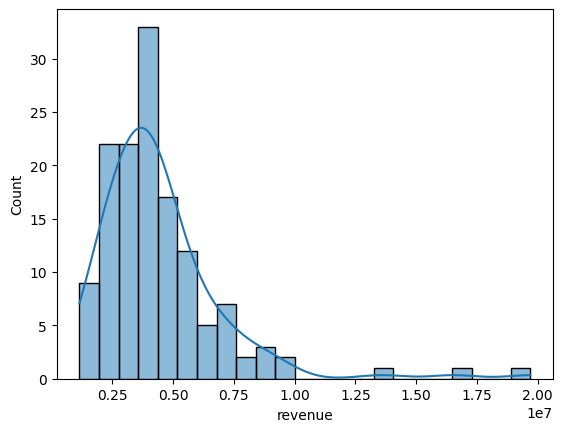

In [562]:
# Visualize the data
from scipy.stats import boxcox


# Display histogram of revenue
sns.histplot(data=data, x='revenue', kde=True)

# Check skewness of revenue
print('Skewness of revenue:', data['revenue'].skew())


"""
#or:

plt.hist(data['revenue'])
plt.xlabel('revenue')
plt.ylabel('Count')
plt.show()

# or
#sns.displot(data.revenue)

"""

In the above code, we first display a histogram of the revenue variable using sns.histplot(). We then check the skewness of the revenue variable using the .skew() method.

If the skewness is greater than 0.5 in absolute value, we apply the Box-Cox transformation to the revenue variable using the boxcox() function from scipy.stats. Finally, we display a histogram of the transformed revenue variable and check its skewness.

From both summary statistics and the histogram, we can see that we have a skewed distribution.

## Box-Cox transformation to target variable revenue

Skewness of transformed revenue: -0.012360200578952143


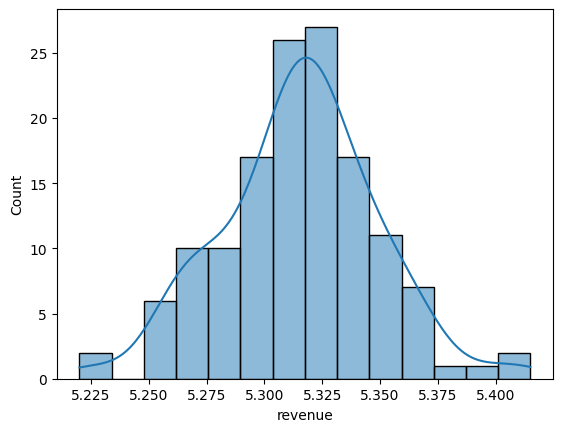

In [563]:

# Apply Box-Cox transformation to revenue if it is highly skewed
if abs(data['revenue'].skew()) > 0.5:
    data['revenue'], _ = boxcox(data['revenue'])

# Display histogram of transformed revenue
sns.histplot(data=data, x='revenue', kde=True)

# Check skewness of transformed revenue
print('Skewness of transformed revenue:', data['revenue'].skew())

# Show plot
plt.show()

Box-Cox transformation is a mathematical transformation technique that is used to transform non-normal dependent variables into a normal shape. It is a parametric method that requires the estimation of a parameter, lambda (λ), which determines the extent of the transformation. When lambda is 0, Box-Cox transformation becomes a log transformation, while for lambda values other than zero, it is a power transformation. The Box-Cox transformation is widely used in statistical analysis, including regression analysis, to improve the accuracy and reliability of the results. The transformation can help in reducing the impact of outliers, improving the normality of the data, and stabilizing the variance.

In [456]:
"""
q_low = data['revenue'].quantile(0.01)
q_hi  = data['revenue'].quantile(0.95)

data = data[(data['revenue'] < q_hi) & (data['revenue'] > q_low)]
"""

In [564]:
data[['revenue']].describe()

,revenue
count,137.000000
mean,5.315155
std,0.033549
min,5.219999
25%,5.296888
50%,5.316516
75%,5.335112
max,5.415038


Also from summary statistics, we can see that some other columns (e.g, P1, P5, P7, etc.) have a low frequency for some categories.
For instance, we can plot the distribution of P5 using the bar chart to see that categories 5, 6 and 8 are rare in the population (we have only 4 observations). However, the low frequency of observations might actually be an important characteristic of the data and excluding them would result in a biased analysis. Therefore, we will not exclude these observations as outliers from the data (this could be a robustness check for later to see how the results will change if excluding them).

<AxesSubplot: xlabel='P5', ylabel='count'>

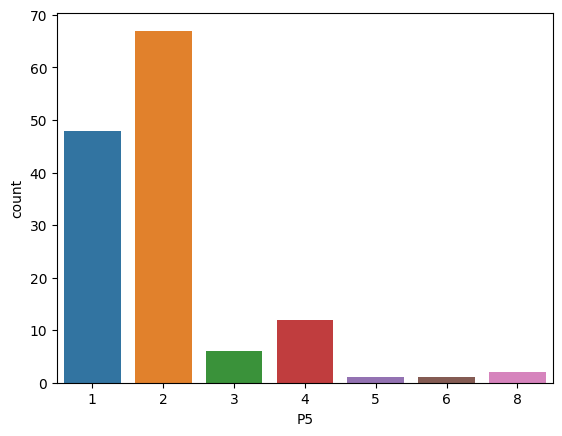

In [565]:
sns.countplot(data=data, x='P5')

In [566]:
data[(data.P5>data.P5.quantile(0.9))| (data.P5>data.P5.quantile(0.99))]

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014
5,6,6.0,4.5,7.5,8,10,10,8,8,8,...,0,0,0,0,0,1,0,0,0,0
9,6,4.5,6.0,7.5,6,4,10,10,10,10,...,0,0,0,0,0,0,1,0,0,0
78,9,7.5,6.0,7.5,8,6,10,10,8,8,...,0,0,0,0,0,0,0,1,0,0
124,1,3.0,0.0,5.0,5,5,1,5,5,5,...,1,0,0,0,0,0,0,0,0,0


## Computing the mean revenue of Big Cities  

In [567]:
data.groupby('City Group_Big Cities').revenue.mean()  

City Group_Big Cities
0    5.307035
1    5.321296
Name: revenue, dtype: float64

Big cities generate higher revenues which follows our intuition. 
Let's check if the difference in revenues between big and other cities is significant: 

## Hypothesis testing

In [568]:

from scipy.stats import ttest_ind

BigCities = data[data['City Group_Big Cities'] == 1]
OtherCities = data[data['City Group_Big Cities'] == 0]

t, p = ttest_ind(BigCities['revenue'], OtherCities['revenue'])

if p < 0.05:
    print('There is a significant difference in revenue between big and other cities')
else:
    print('There is no significant difference in revenue between big and other cities')


There is a significant difference in revenue between big and other cities


In [569]:
# Hypothesis testing for Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
FC_Type = data[data['Type_FC'] == 1]
Other_Types = data[data['Type_FC'] == 0]

t, p = ttest_ind(FC_Type['revenue'], Other_Types['revenue'])

if p < 0.05:
    print('There is a significant difference in revenue between Food Court and other type of restaurants')
else:
    print('There is no significant difference in revenue between Food Court and other type of restaurants')

There is no significant difference in revenue between Food Court and other type of restaurants


## Correlation analysis

In [570]:
# Calculate the correlation coefficients
correlations = data.corr()
# Sort and Print the correlation matrix based on the correlation between the target variable and the other variables
target_corr =correlations['revenue'].sort_values(ascending=False)
#print(target_corr)

# Print the top 20 explanatory variables that are highly correlated with the target variable
print(target_corr[1:21])



year_2000                0.262121
P28                      0.219107
P2                       0.217585
City Group_Big Cities    0.211258
year_1999                0.183719
P6                       0.174962
P21                      0.146885
P23                      0.132846
P1                       0.117043
year_2008                0.115585
P22                      0.114510
P17                      0.112668
P7                       0.111260
P11                      0.103913
P25                      0.100659
P19                      0.095674
P4                       0.078641
P24                      0.075924
P20                      0.072121
year_2007                0.070533
Name: revenue, dtype: float64


## Creating a heatmap to visualise correlations 

<AxesSubplot: >

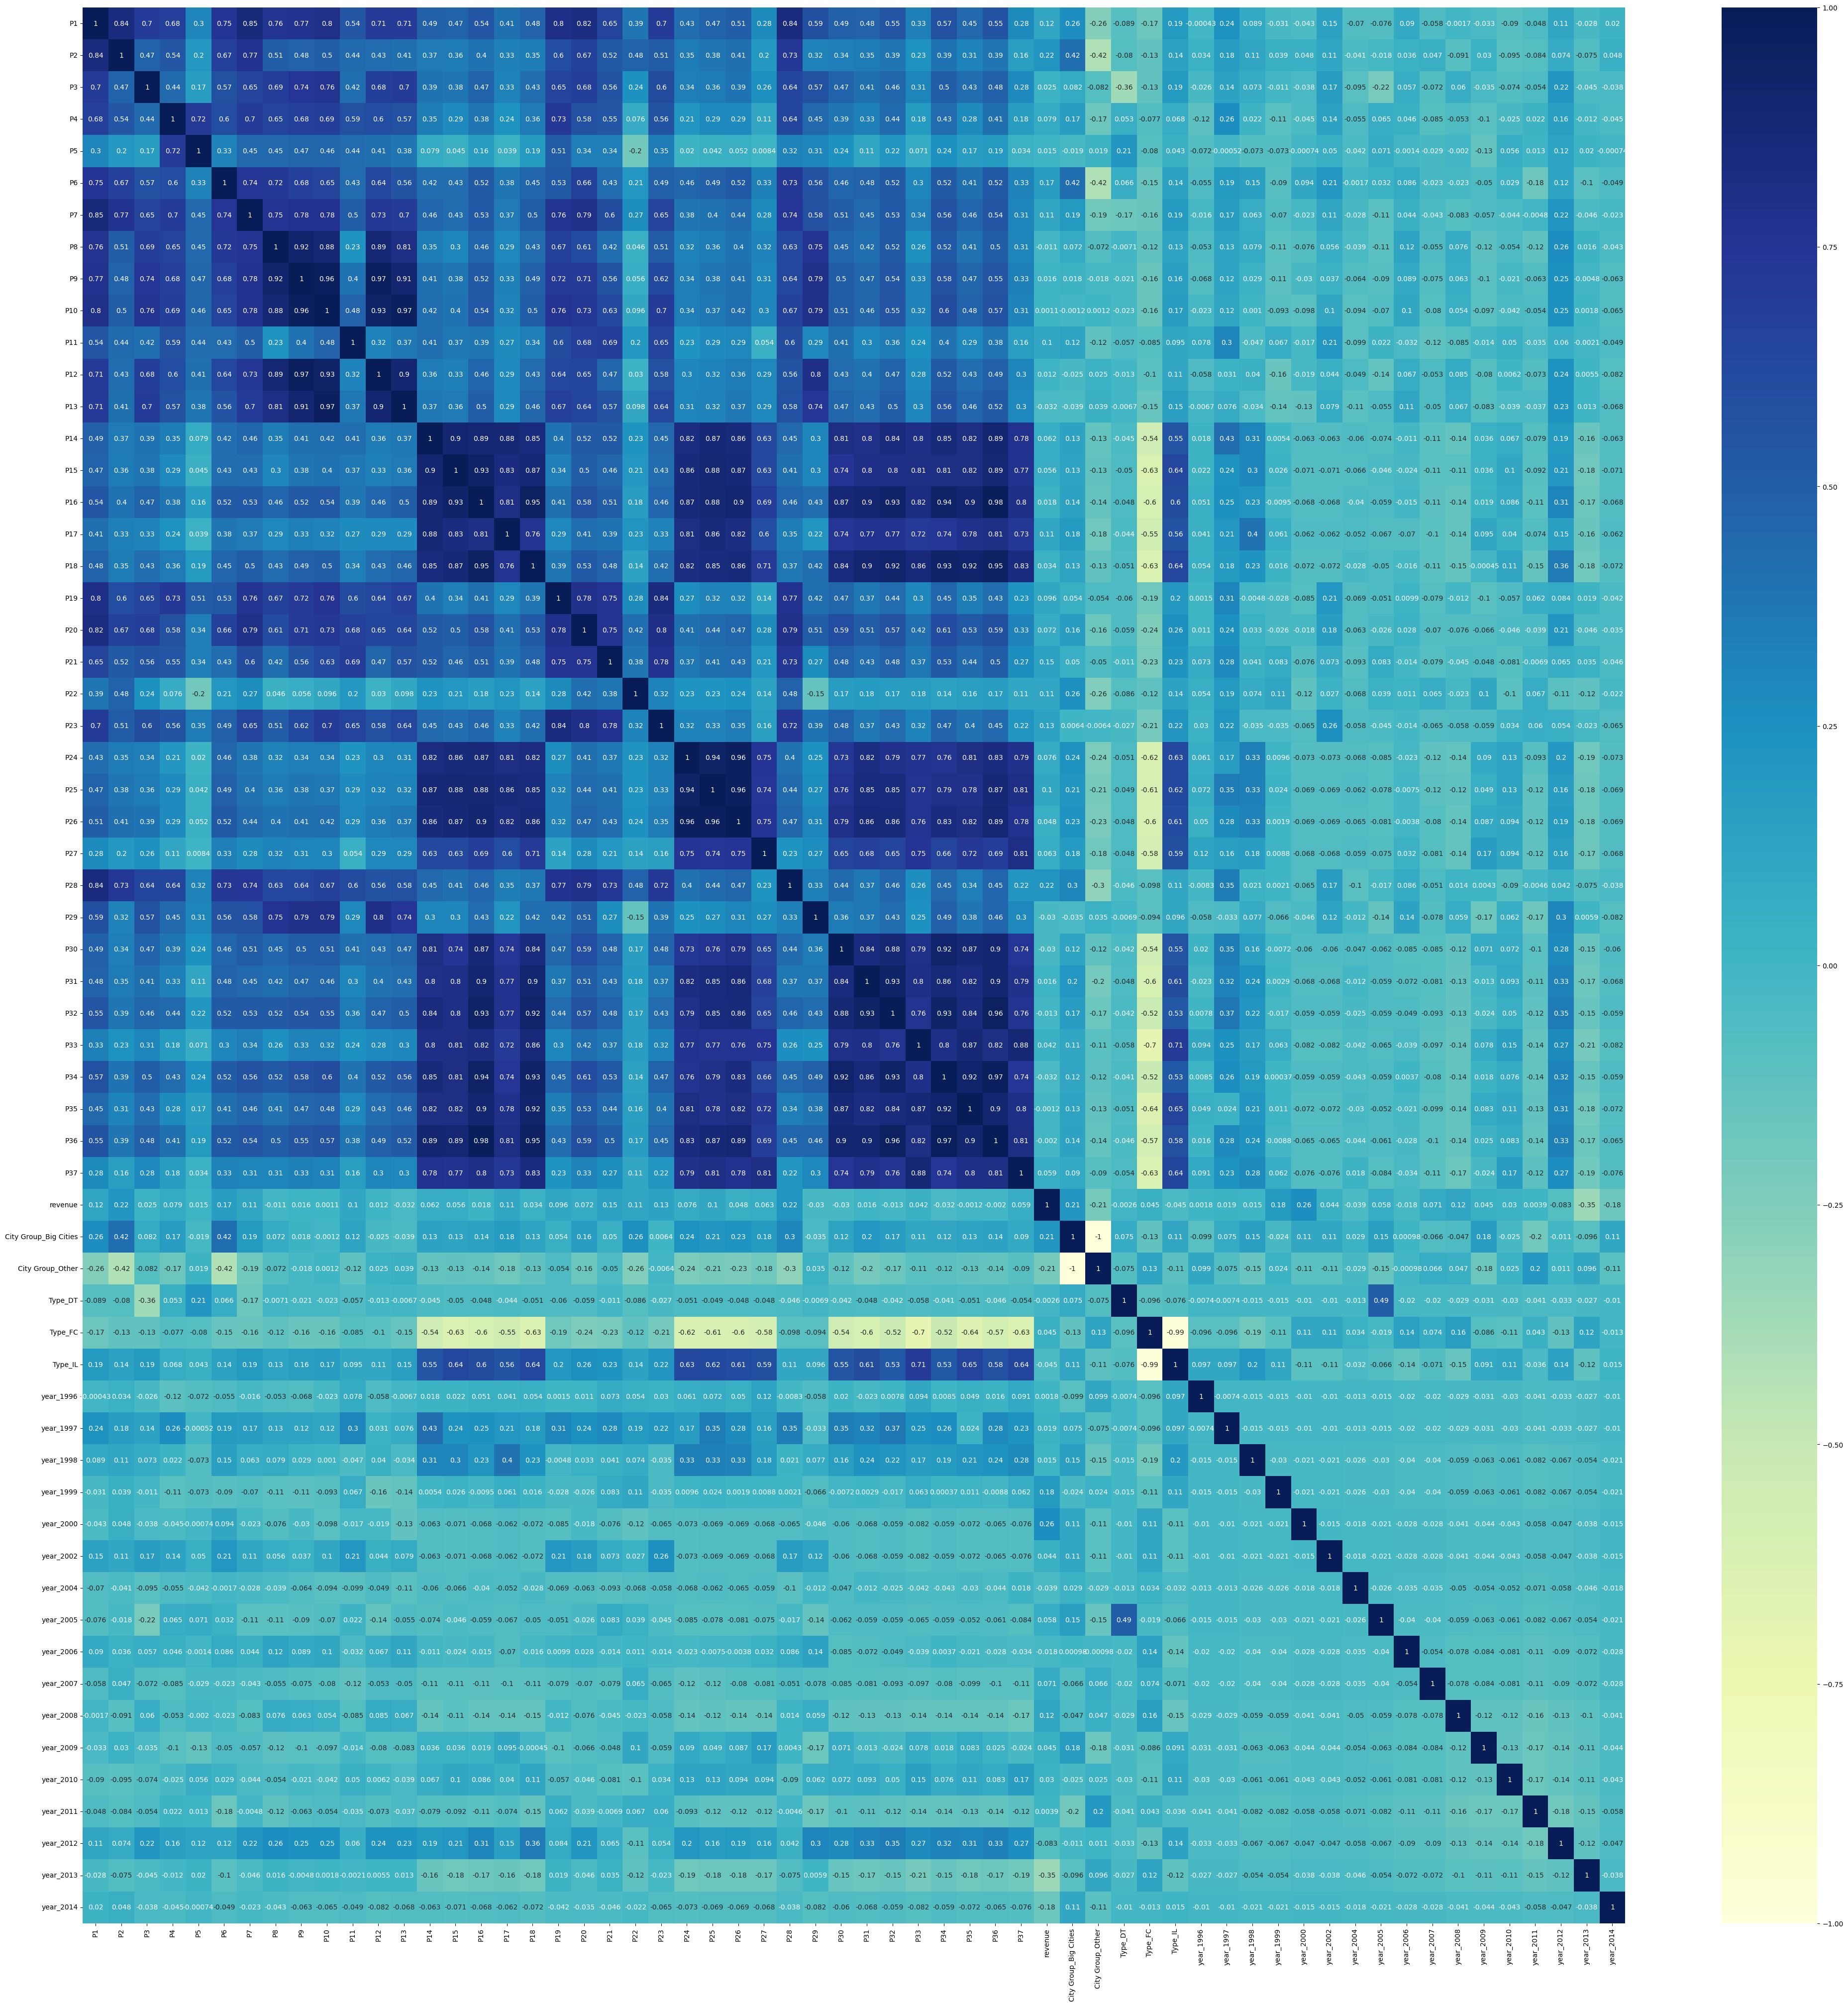

In [571]:
import seaborn as sns

plt.figure(figsize=(50, 50))
#sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

The P1, P2 - P37 which refer to Demographic, Real State, and Commercial data are highly correlated with each other. Including all of them together for analysis may lead to multicollinearity problem.

The correlation analysis and heatmap  shows that there is a higher correlation between the following independent variables and revenue compared to others:
City_İstanbul            0.270614
City Group_Big Cities    0.204808
P2                       0.194918
City_İzmir               0.171917
P28                      0.163635
P23                      0.112622
P1                       0.104261
P7                       0.100897
Type_FC                  0.095219
City_Trabzon             0.078520

In [309]:
# data=(data-data.mean())/data.std() #  by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

In [572]:
print(data.isna().sum().to_string()) # # This returns the columns in our Pandas dataframe along with the number of missing values detected in each one

P1                       0
P2                       0
P3                       0
P4                       0
P5                       0
P6                       0
P7                       0
P8                       0
P9                       0
P10                      0
P11                      0
P12                      0
P13                      0
P14                      0
P15                      0
P16                      0
P17                      0
P18                      0
P19                      0
P20                      0
P21                      0
P22                      0
P23                      0
P24                      0
P25                      0
P26                      0
P27                      0
P28                      0
P29                      0
P30                      0
P31                      0
P32                      0
P33                      0
P34                      0
P35                      0
P36                      0
P37                      0
r

## power transformation to rescale continuous features in the dataset

Both PowerTransformer and StandardScaler are used to rescale continuous features in a dataset.

StandardScaler scales the data to have a mean of 0 and standard deviation of 1. It assumes the data follows a normal distribution. This method is appropriate when the distribution of the features is close to a normal distribution.

PowerTransformer applies a power transformation to the data, which can help to remove skewness and make the distribution more Gaussian-like. It can be used for data that does not follow a normal distribution. PowerTransformer can apply two types of power transformations: the Yeo-Johnson transformation and the Box-Cox transformation. The Yeo-Johnson transformation can be used for both positive and negative values, while the Box-Cox transformation can only be used for positive values.

In [573]:
from sklearn.preprocessing import PowerTransformer

# Select continuous columns for rescaling
cols_to_exclude = ['revenue', 'City Group_Big Cities', 'City Group_Other', 'Type_DT', 'Type_FC', 'Type_IL']+ \
                  ['year_{}'.format(y) for y in range(1996, 2015)]

num_cols = [col for col in data.columns if col not in cols_to_exclude]

# Instantiate the PowerTransformer object
pt = PowerTransformer()

# Fit and transform the selected columns using PowerTransformer
data[num_cols] = pt.fit_transform(data[num_cols])


In [574]:
data.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014
0,0.402120,0.394475,-0.314026,-0.233402,0.362117,-0.615819,-0.119084,-0.600861,0.139676,0.095506,...,0,0,0,0,0,0,0,0,0,0
1,0.402120,0.394475,-0.314026,-0.233402,-1.222078,-0.615819,-0.119084,0.091085,0.139676,0.095506,...,0,0,0,1,0,0,0,0,0,0
2,-0.847857,-0.267074,-2.230643,0.774736,0.362117,0.162948,-0.119084,0.091085,0.139676,0.095506,...,0,0,0,0,0,0,0,0,1,0
3,1.040770,0.064084,1.645414,1.489835,1.579756,0.674633,1.855832,1.502042,1.819274,1.820408,...,0,0,0,0,0,0,0,1,0,0
4,-0.097603,-0.267074,-1.278840,-0.233402,0.362117,-0.615819,-0.119084,0.091085,0.139676,0.095506,...,0,0,0,0,1,0,0,0,0,0


# Data Modeling 


In [577]:
# separate the target
y = data.revenue

In [578]:
print(data.columns)
# Create X (we can return to modify this line!)
#  'City_Elazığ' does not exist in the test_data and therefore is excluded from the list of features
"""
    features = ['City_İstanbul', 'City Group_Big Cities', 'City_İzmir', 'P2', 'P28', 'P23', 'P1', 'P7', 'Type_FC', 'City_Trabzon', 'P17', 'P6', 'P25', 'P21', 'P11', 'P24', 'P19', 'P22', 'P14' ]
    X = data[features]
    X.head()
"""
features = [x for x in data.columns if x not in 'revenue'] ## Removing our target variable
X = data[features]

"""
X = data.drop(['revenue'],axis = 1)
X.head()
"""

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue',
       'City Group_Big Cities', 'City Group_Other', 'Type_DT', 'Type_FC',
       'Type_IL', 'year_1996', 'year_1997', 'year_1998', 'year_1999',
       'year_2000', 'year_2002', 'year_2004', 'year_2005', 'year_2006',
       'year_2007', 'year_2008', 'year_2009', 'year_2010', 'year_2011',
       'year_2012', 'year_2013', 'year_2014'],
      dtype='object')


"\nX = data.drop(['revenue'],axis = 1)\nX.head()\n"

In [579]:
print(len(features))

59


## Splitting the Dataset

In [417]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.7, random_state = RANDOM_STATE)

# We will keep the shuffle = True since our dataset has not any time dependency.

In [580]:
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state = 0)

## Training 

Now that we have a usable dataset we can make models using popular regression algorithms

## First method : Linear Regression

In [581]:
# We use a linear regression first as a baseline method

# To improve accuracy, we create a new Linear Regression model which we will train on all training data
linear_model = LinearRegression()

# fit linear_model on all data from the training data
linear_model.fit(train_X, train_y)

LinearRegression()

In [582]:
# make predictions with validation data 
val_y_preds = linear_model.predict(val_X)

#MAE
print("Mean Absolute Error:\n")
print(mae(val_y, val_y_preds))

# MSE
MSE = mse(val_y, val_y_preds)
print("Mean Square Error:\n")
print(MSE)

#RMSE
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Mean Absolute Error:

0.05230158723860519
Mean Square Error:

0.005196753434843825
Root Mean Square Error:

0.07208851111546018


In [583]:
xmin= min(val_y.min(), val_y_preds.min() )-1 #The -1 is used to add a small buffer of one unit to the left of this value, so that the minimum value is not at the edge of the plot.
xmax= max(val_y.max(), val_y_preds.max() )+1

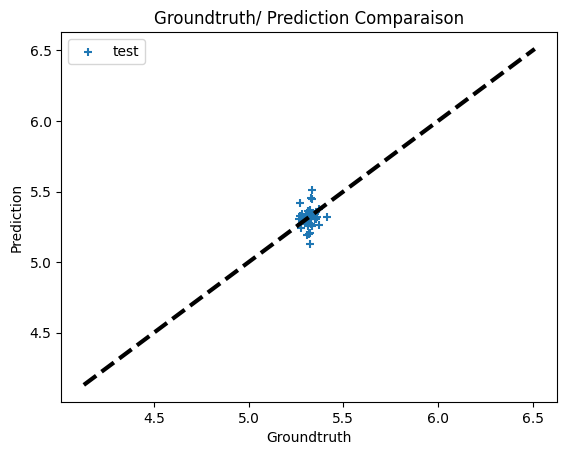

In [584]:
fig = plt.figure(1)
plt.scatter(val_y,val_y_preds, marker='+', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--') ## droite separatrice d'equation x2=x1

plt.xlabel('Groundtruth')
plt.ylabel('Prediction') 
plt.title('Groundtruth/ Prediction Comparaison')
plt.legend()
plt.savefig('LR.png')

With this graph we can see how well our model is doing. The black line corresponds to the equation y=x. Thus, points on the line are perfectly predicted. Points that are far from the line come from a bad prediction.

We get a bad score. Let's test other algorithms 

## Second method : Decision Tree

There are several hyperparameters in the Decision Tree object from Scikit-learn. We will use only some of them and also we will not perform feature selection nor hyperparameter tuning.

The hyperparameters we will use and investigate here are:

 - min_samples_split: The minimum number of samples required to split an internal node. 
   - Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
 - max_depth: The maximum depth of the tree. 
   - Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.

In [585]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

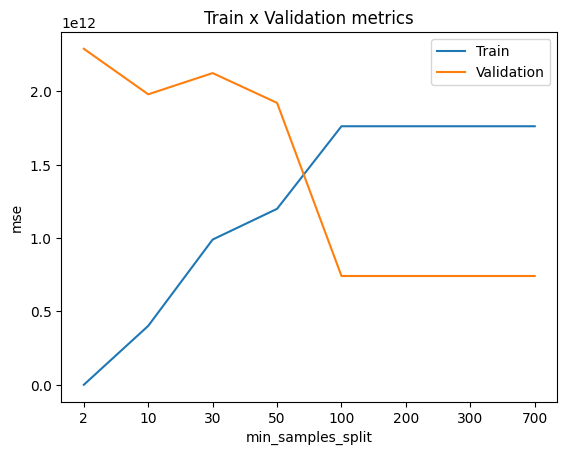

In [586]:
mse_list_train = []
mse_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 0).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    mse_train = mse(predictions_train,y_train)
    mse_val = mse(predictions_val,y_val)
    mse_list_train.append(mse_train)
    mse_list_val.append(mse_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('mse')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(mse_list_train)
plt.plot(mse_list_val)
plt.legend(['Train','Validation'])

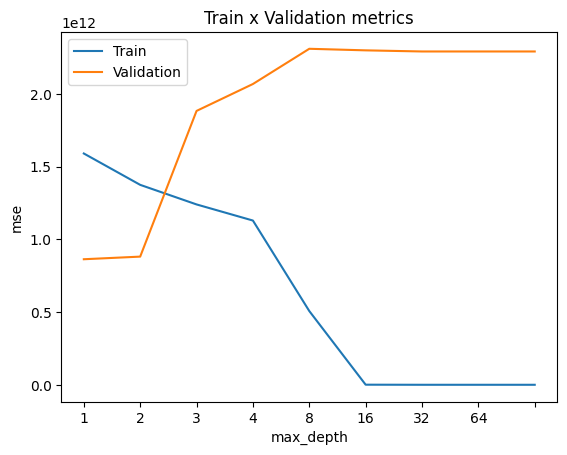

In [587]:
mse_list_train = []
mse_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeRegressor(max_depth = max_depth,
                                   random_state = 0).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    mse_train = mse(predictions_train,y_train)
    mse_val = mse(predictions_val,y_val)
    mse_list_train.append(mse_train)
    mse_list_val.append(mse_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('mse')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(mse_list_train)
plt.plot(mse_list_val)
plt.legend(['Train','Validation'])

## Third method : Random Forest

Trees algorithms work well on structured tabular data. We can start by using a Random Forest model

In [588]:
# To improve accuracy, we create a new Random Forest model which we will train on all training data
forest_model = RandomForestRegressor(random_state=0)

# fit forest_model on all data from the training data
forest_model.fit(train_X, train_y)

RandomForestRegressor(random_state=0)

In [589]:
# make predictions which we will submit. 
val_y_preds = forest_model.predict(val_X)

#MAE
print("Mean Absolute Error:\n")
print(mae(val_y, val_y_preds))


# RMSE
MSE = mse(val_y, val_y_preds)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Mean Absolute Error:

0.021293281881914365
Root Mean Square Error:

0.027833905979018966


In [590]:
xmin= min(val_y.min(), val_y_preds.min() )-1 #The -1 is used to add a small buffer of one unit to the left of this value, so that the minimum value is not at the edge of the plot.
xmax= max(val_y.max(), val_y_preds.max() )+1

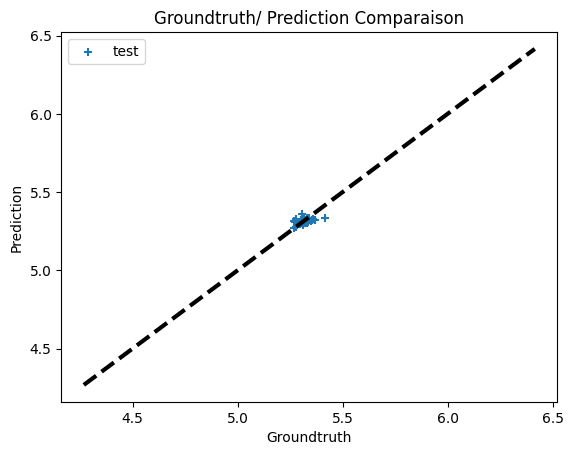

In [591]:
fig = plt.figure(1)
plt.scatter(val_y,val_y_preds, marker='+', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--') ## droite separatrice d'equation x2=x1

plt.xlabel('Groundtruth')
plt.ylabel('Prediction') 
plt.title('Groundtruth/ Prediction Comparaison')
plt.legend()
plt.savefig('LR.png')

We can try another method

## Fourth Method : Gradient Boosting
Next is the Gradient Boosting model, called XGBoost. The boosting methods train several trees, but instead of them being uncorrelated to each other, now the trees are fit one after the other in order to minimize the error. 
​
The model has the same parameters as a decision tree, plus the learning rate.
- The learning rate is the size of the step on the Gradient Descent method that the XGBoost uses internally to minimize the error on each train step.
​
One interesting thing about the XGBoost is that during fitting, it can take in an evaluation dataset of the form `(X_val,y_val)`.
- On each iteration, it measures the cost (or evaluation metric) on the evaluation datasets.
- Once the cost (or metric) stops decreasing for a number of rounds (called early_stopping_rounds), the training will stop. 
- More iterations lead to more estimators, and more estimators can result in overfitting.  
- By stopping once the validation metric no longer improves, we can limit the number of estimators created, and reduce overfitting.

In [592]:
# To improve accuracy, we create a new Random Forest model which we will train on all training data
gb_model = GradientBoostingRegressor(random_state=0)

# fit gb_model on all data from the training data
gb_model.fit(train_X, train_y)

GradientBoostingRegressor(random_state=0)

In [596]:
# make predictions which we will submit. 
val_y_preds = gb_model.predict(val_X)

#MAE
print("Mean Absolute Error:\n")
print(mae(val_y, val_y_preds))


# RMSE
MSE = mse(val_y, val_y_preds)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Mean Absolute Error:

0.02472657724030484
Root Mean Square Error:

0.03193608399877356


In [597]:
xmin= min(val_y.min(), val_y_preds.min() )-1 #The -1 is used to add a small buffer of one unit to the left of this value, so that the minimum value is not at the edge of the plot.
xmax= max(val_y.max(), val_y_preds.max() )+1

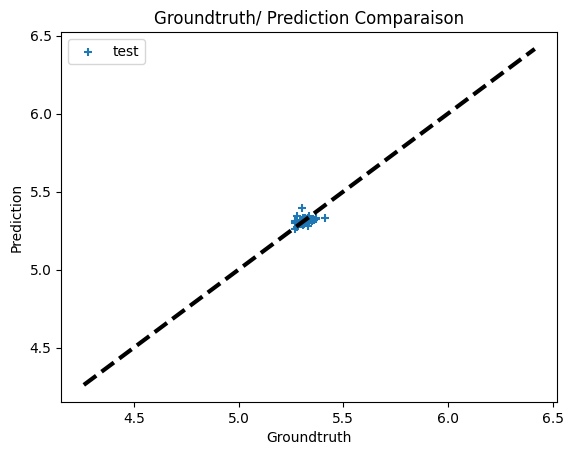

In [598]:
fig = plt.figure(1)
plt.scatter(val_y,val_y_preds, marker='+', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--') ## droite separatrice d'equation x2=x1

plt.xlabel('Groundtruth')
plt.ylabel('Prediction') 
plt.title('Groundtruth/ Prediction Comparaison')
plt.legend()
plt.savefig('LR.png')

Now, we read the file of "test" data, and apply our model to make predictions.

In [256]:
# path to file we will use for predictions
test_data_path = 'Downloads/test.csv/test.csv'

# read test data file using pandas
test_data = pd.read_csv(test_data_path)

test_data

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,01/05/2000,Antalya,Other,FC,5,5.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
99996,99996,07/18/2011,Niğde,Other,IL,1,2.0,4.0,3.0,1,...,1.0,3.0,5,0,0,0,4,0,0,0
99997,99997,12/29/2012,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,...,4.0,1.0,5,5,3,2,4,4,4,2
99998,99998,10/12/2013,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,...,7.5,5.0,0,0,0,4,0,0,0,0


In [257]:
# Convert categorical variables to numerical variables

#one-hots for City, City Group and Type
test_data = pd.get_dummies(test_data, columns= ['City', 'City Group', 'Type'])



In [258]:
test_data

,Id,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,...,City_Çorum,City_İstanbul,City_İzmir,City_Şanlıurfa,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL,Type_MB
0,0,01/22/2011,1,4.0,4.0,4.0,1,2,5,4,...,0,0,0,0,0,1,0,1,0,0
1,1,03/18/2011,3,4.0,4.0,4.0,2,2,5,3,...,0,0,0,0,0,1,0,0,1,0
2,2,10/30/2013,3,4.0,4.0,4.0,2,2,5,4,...,0,0,0,0,1,0,0,1,0,0
3,3,05/06/2013,2,4.0,4.0,4.0,2,3,5,4,...,0,0,0,0,0,1,0,0,1,0
4,4,07/31/2013,2,4.0,4.0,4.0,1,2,5,4,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,01/05/2000,5,5.0,4.0,4.0,2,2,5,5,...,0,0,0,0,0,1,0,1,0,0
99996,99996,07/18/2011,1,2.0,4.0,3.0,1,1,1,5,...,0,0,0,0,0,1,0,0,1,0
99997,99997,12/29/2012,4,5.0,4.0,4.0,1,2,5,3,...,0,1,0,0,1,0,0,0,1,0
99998,99998,10/12/2013,12,7.5,6.0,6.0,4,4,10,10,...,0,1,0,0,1,0,0,1,0,0


In [259]:
# create test_X which comes from test_data but includes only the columns we used for prediction.
# The list of columns is stored in a variable called X
test_X = test_data[features]

# make predictions which we will submit. 
test_preds = linear_model.predict(test_X)


In [284]:
print("Making predictions for the following 5 restaurants:")
print(X.head())
print("The predictions are")
print(lr_model_on_full_data.predict(X.head()))

Making predictions for the following 5 restaurants:
   City_İstanbul  City Group_Big Cities  City_İzmir   P2  P28  P23  P1  P7  \
0              1                      1           0  5.0  2.0    3   4   5   
1              0                      1           0  5.0  3.0    2   4   5   
2              0                      0           0  4.0  1.0    1   2   5   
3              0                      0           0  4.5  2.5   10   6  10   
4              0                      0           0  4.0  1.0    1   3   5   

   Type_FC  City_Trabzon  P17  P6  P25  P21  P11  P24  P19  P22  P14  
0        0             0    2   2    1    1    3    1    5    3    1  
1        1             0    0   2    0    1    1    0    3    3    0  
2        0             0    0   3    0    1    2    0    1    1    0  
3        0             0    3   4    2    6    8    2   20    1    6  
4        0             0    1   2    3    1    2    2    2    2    2  
The predictions are
[5190851.42591812 3457777.0485552

# Generate a submission

Run the code cell below to generate a CSV file with your predictions

In [260]:
# Run the code to save predictions in the format used for competition scoring

output = pd.DataFrame({'Id': test_data.Id,
                       'revenue': test_preds})
output.to_csv('submission_lr.csv', index=False)

# Experimenting with more features

In [280]:
# Print the top 20 explanatory variables that are highly correlated with the target variable
print(target_corr[1:21])

City_İstanbul            0.320969
City Group_Big Cities    0.227344
P2                       0.218030
P28                      0.193111
City_İzmir               0.137736
P17                      0.132829
P6                       0.112902
P25                      0.096159
P1                       0.095406
P21                      0.091306
P7                       0.084006
P11                      0.076014
P23                      0.074278
P24                      0.068565
P19                      0.068203
P22                      0.063023
City_Trabzon             0.062950
Type_FC                  0.061890
City_Elazığ              0.055195
P14                      0.051621
Name: revenue, dtype: float64


In [281]:
print(data.columns)
# Create X (we can return to modify this line!)
#  'City_Elazığ' does not exist in the test_data and therefore is excluded from the list of features
features = ['City_İstanbul', 'City Group_Big Cities', 'City_İzmir', 'P2', 'P28', 'P23', 'P1', 'P7', 'Type_FC', 'City_Trabzon', 'P17', 'P6', 'P25', 'P21', 'P11', 'P24', 'P19', 'P22', 'P14' ]

# Select columns corresponding to features, and preview the data
X = data[features]
X.head()

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue', 'City_Adana',
       'City_Afyonkarahisar', 'City_Amasya', 'City_Ankara', 'City_Antalya',
       'City_Aydın', 'City_Balıkesir', 'City_Bolu', 'City_Bursa',
       'City_Denizli', 'City_Diyarbakır', 'City_Edirne', 'City_Elazığ',
       'City_Eskişehir', 'City_Gaziantep', 'City_Isparta', 'City_Karabük',
       'City_Kastamonu', 'City_Kayseri', 'City_Kocaeli', 'City_Konya',
       'City_Kütahya', 'City_Muğla', 'City_Osmaniye', 'City_Sakarya',
       'City_Samsun', 'City_Tekirdağ', 'City_Tokat', 'City_Trabzon',
       'City_Uşak', 'City_İstanbul', 'City_İzmir', 'City_Şanlıurfa',
       'City Group_Big Cities', 'City Group_Other', 'Type_DT', 'Type_FC',
       'Type_IL'],
      dtype='object')


,City_İstanbul,City Group_Big Cities,City_İzmir,P2,P28,P23,P1,P7,Type_FC,City_Trabzon,P17,P6,P25,P21,P11,P24,P19,P22,P14
0,1,1,0,5.0,2.0,3,4,5,0,0,2,2,1,1,3,1,5,3,1
1,0,1,0,5.0,3.0,2,4,5,1,0,0,2,0,1,1,0,3,3,0
2,0,0,0,4.0,1.0,1,2,5,0,0,0,3,0,1,2,0,1,1,0
3,0,0,0,4.5,2.5,10,6,10,0,0,3,4,2,6,8,2,20,1,6
4,0,0,0,4.0,1.0,1,3,5,0,0,1,2,3,1,2,2,2,2,2


In [283]:
# Training: Linear Regression

# To improve accuracy, we create a new Linear Regression model which we will train on all training data
lr_model_on_full_data = LinearRegression()

# fit lr_model_on_full_data on all data from the training data
lr_model_on_full_data.fit(X, y)


# create test_X which comes from test_data but includes only the columns we used for prediction.
# The list of columns is stored in a variable called X
test_X = test_data[features]

# make predictions which we will submit. 
test_preds = lr_model_on_full_data.predict(test_X)

# Run the code to save predictions in the format used for competition scoring

output = pd.DataFrame({'Id': test_data.Id,
                       'revenue': test_preds})
output.to_csv('submission2_lr.csv', index=False)